<a href="https://colab.research.google.com/github/mariam-ahmed10/IT326-project/blob/main/p1_2%20(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IT326-project


## Phase 1


The aim of this project is to study students grades and classify them under specific categories such as Excellent, Good, and Satisfactory, while discovering the factors that affect them using data mining techniques. Data mining algorithms will be applied to extract patterns and relationships between students' grades and various factors, aiming to identify the main influences on academic performance.

## The source of the dataset https://www.kaggle.com/datasets/desalegngeb/students-exam-scores

## Motivation and Goal :
The purpose of this dataset is to use data mining algorithms such as classification and clustering to evaluate and understand the elements that influence students' test performance. We will apply classification algorithms to categorize students into high, medium, or low performance levels and use K-means clustering to group students based on performance and personal attributes.


## General information :

Number of attributes : 14 attributes

Number of Observations : more than 300,000



attributes Descriptions :

1- Gender: The gender of the student (male or female).

2- EthnicGroup: Ethnic group of the student (group A to E)

3-ParentEduc: Parent(s) education background (from some_highschool to master's degree)

4-LunchType: School lunch type (standard or free/reduced)

5-TestPrep: Test preparation course followed (completed or none)

6-ParentMaritalStatus: Parent(s) marital status (married/single/widowed/divorced)

7-PracticeSport: How often the student parctice sport (never/sometimes/regularly)

8-IsFirstChild: If the child is first child in the family or not (yes/no)

9-NrSiblings: Number of siblings the student has (0 to 7)

10- TransportMeans: Means of transport to school (schoolbus/private)

11- WklyStudyHours: Weekly self-study hours(less that 5hrs; between 5 and 10hrs; more than 10hrs)

12- MathScore: math test score(0-100)

13- ReadingScore: reading test score(0-100)

14- WritingScore: writing test score(0-100)

-The Class label is the final grades of students in each subject (math, reading, and writing)

In [7]:
import pandas as pd
data = pd.read_csv('/Expanded_data_with_more_features.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [8]:
rows, columns = data.shape
print(f"number of rows : {rows}, number of columns : {columns}")
print("names of attributes :\n", data.columns)
print("type of attributes :\n", data.dtypes)

number of rows : 30641, number of columns : 15
names of attributes :
 Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore'],
      dtype='object')
type of attributes :
 Unnamed: 0               int64
Gender                  object
EthnicGroup             object
ParentEduc              object
LunchType               object
TestPrep                object
ParentMaritalStatus     object
PracticeSport           object
IsFirstChild            object
NrSiblings             float64
TransportMeans          object
WklyStudyHours          object
MathScore                int64
ReadingScore             int64
WritingScore             int64
dtype: object


# Phase 2


In [9]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import chi2_contingency
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.stats import mode
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [10]:
df = pd.read_csv("/Expanded_data_with_more_features.csv",sep=",")
df
#Using the Pandas library's functionalities to read data from a CSV file
#into a Pandas DataFrame, enabling us to examine, and visualize the data.

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


### 20 Sample from the data

In [11]:
sample_data = df.sample(n=20);
sample_data

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
17369,473,female,group C,some college,free/reduced,none,divorced,sometimes,no,1.0,private,< 5,49,73,66
8719,229,female,group B,associate's degree,free/reduced,none,married,regularly,yes,0.0,private,< 5,65,81,80
10053,628,male,group C,bachelor's degree,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,78,64,59
18182,342,female,group D,high school,free/reduced,NaN,married,regularly,no,7.0,school_bus,5 - 10,51,64,67
17070,156,male,group D,NaN,standard,completed,married,regularly,yes,NaN,school_bus,NaN,72,77,79
28902,844,female,group D,some college,standard,none,single,regularly,yes,1.0,school_bus,5 - 10,75,82,83
4527,777,female,group C,high school,free/reduced,completed,married,sometimes,no,1.0,school_bus,< 5,67,83,74
30516,473,female,group B,some high school,standard,none,divorced,sometimes,no,3.0,school_bus,5 - 10,55,62,61
8989,511,male,group E,associate's degree,free/reduced,none,married,sometimes,yes,3.0,school_bus,5 - 10,53,49,44
11641,342,female,group D,associate's degree,free/reduced,none,married,sometimes,no,2.0,NaN,< 5,57,58,56


### 1- Check missing “NA” :

In [12]:
missing_values = df.isna().sum()
print("\nTotal number of missing values in the dataset:", missing_values.sum())

#To begin cleaning and handling the data set, we should know the total number of missing values.


Total number of missing values in the dataset: 13901


In [13]:
print("\nMissing Values:")
missing_values = df.isnull().sum()
missing_table = pd.DataFrame({'Variable': missing_values.index, 'Missing Values': missing_values.values})
display(missing_table)

#The previous code reads data from a CSV file, finds any missing values,
#and creates a table that counts the number of missing values for each variable in the dataset.



Missing Values:


,Variable,Missing Values
0,Unnamed: 0,0
1,Gender,0
2,EthnicGroup,1840
3,ParentEduc,1845
4,LunchType,0
5,TestPrep,1830
6,ParentMaritalStatus,1190
7,PracticeSport,631
8,IsFirstChild,904
9,NrSiblings,1572


#### Filling the missing values:

In [14]:
# Fill missing values for numerical columns with median
df['MathScore'].fillna(df['MathScore'].median(), inplace=True)

# For categorical columns, fill missing values with mode (most frequent value)
df['EthnicGroup'].fillna(df['EthnicGroup'].mode()[0], inplace=True)


 ### 2-Removing duplicates :

In [15]:
num_duplicates = df.duplicated().sum()
df = df.drop_duplicates()
print("Number of duplicate rows:", num_duplicates)
print("DataFrame after dropping all duplicate rows:")
print(df)

Number of duplicate rows: 0
DataFrame after dropping all duplicate rows:
       Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType  \
0               0  female     group C   bachelor's degree      standard   
1               1  female     group C        some college      standard   
2               2  female     group B     master's degree      standard   
3               3    male     group A  associate's degree  free/reduced   
4               4    male     group C        some college      standard   
...           ...     ...         ...                 ...           ...   
30636         816  female     group D         high school      standard   
30637         890    male     group E         high school      standard   
30638         911  female     group C         high school  free/reduced   
30639         934  female     group D  associate's degree      standard   
30640         960    male     group B        some college      standard   

        TestPrep ParentMar

### 3- Detect Outlier using mean method :

In [16]:
# Focusing on the numerical columns: MathScore, ReadingScore, WritingScore
numerical_columns = ['MathScore', 'ReadingScore', 'WritingScore']

# Calculate mean and standard deviation for each numerical column
means = df[numerical_columns].mean()
std_devs = df[numerical_columns].std()

# Define the threshold as 3 standard deviations from the mean
threshold = 3

# Calculate the outlier bounds
outlier_bounds = {
    col: (means[col] - threshold * std_devs[col], means[col] + threshold * std_devs[col])
    for col in numerical_columns
}

# Detect outliers
outliers = pd.DataFrame()
for col in numerical_columns:
    lower_bound, upper_bound = outlier_bounds[col]
    outliers_in_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers = pd.concat([outliers, outliers_in_col])

# Remove duplicate rows (if not already removed)
outliers = outliers.drop_duplicates()

# Display the detected outliers
display(outliers)


,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
17,17,female,group B,some high school,free/reduced,none,divorced,sometimes,yes,1.0,school_bus,5 - 10,18,32,28
55,59,female,group C,some high school,free/reduced,none,single,regularly,yes,3.0,school_bus,> 10,0,17,10
751,787,female,group B,some college,standard,none,single,regularly,no,4.0,private,< 5,18,37,32
928,980,female,group B,high school,free/reduced,none,married,sometimes,yes,1.0,private,5 - 10,8,24,23
3283,471,female,group C,some high school,free/reduced,none,married,sometimes,no,2.0,private,5 - 10,17,36,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12748,526,male,group C,some high school,free/reduced,none,NaN,regularly,no,1.0,private,> 10,25,27,19
16326,361,male,group C,some high school,standard,none,married,regularly,yes,2.0,private,5 - 10,25,27,16
21462,848,male,group B,some high school,free/reduced,none,married,sometimes,yes,1.0,school_bus,5 - 10,25,28,20
21579,975,female,group B,high school,free/reduced,NaN,single,never,no,1.0,private,5 - 10,24,26,22


### 4. Statistical summary of the numerical data

In [17]:
# 4. Statistical Summary
print("\nStatistical Summary of the DataFrame:")
display(df.describe())



Statistical Summary of the DataFrame:


,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


###5- Correlation Coefficient & Variance & Mean & Median:

In [18]:
# Correlation Coefficient (only on numerical columns)
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
correlation = numeric_df.corr()
print("\nCorrelation Coefficient Matrix:")
display(correlation)

# Mean of numerical columns
mean_values = df[numerical_columns].mean()
print("\nMean of the numerical columns:")
display(mean_values)

# Variance of the numerical columns
variance = df[numerical_columns].var()
print("\nVariance of the numerical columns:")
display(variance)

# Median of numerical columns
median_values = df[numerical_columns].median()
print("\nMedian of the numerical columns:")
display(median_values)



Correlation Coefficient Matrix:


,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
Unnamed: 0,1.000000,-0.000096,-0.000476,-0.001349,-0.000781
NrSiblings,-0.000096,1.000000,-0.001195,-0.000874,-0.002554
MathScore,-0.000476,-0.001195,1.000000,0.817825,0.807118
ReadingScore,-0.001349,-0.000874,0.817825,1.000000,0.952584
WritingScore,-0.000781,-0.002554,0.807118,0.952584,1.000000



Mean of the numerical columns:


,0
MathScore,66.558402
ReadingScore,69.377533
WritingScore,68.418622



Variance of the numerical columns:


,0
MathScore,235.979234
ReadingScore,217.826655
WritingScore,238.502459



Median of the numerical columns:


,0
MathScore,67.0
ReadingScore,70.0
WritingScore,69.0


###6- Understanding the data through graph representations:

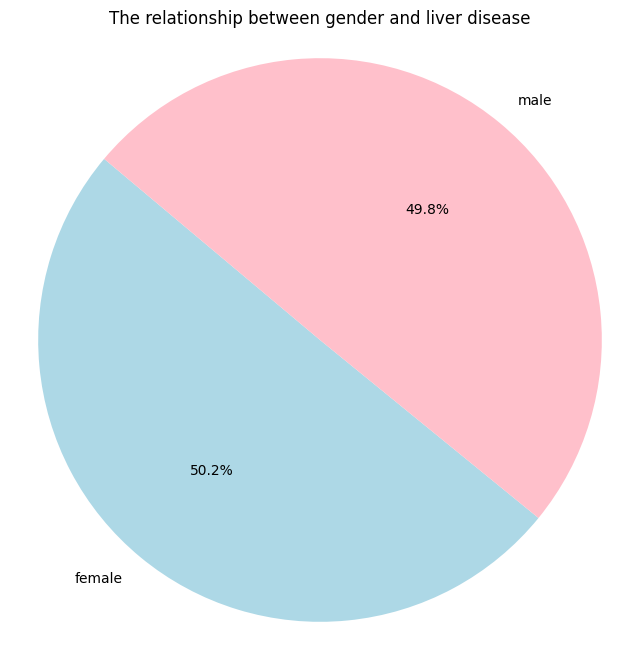

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
gender_diagnosis_counts = df[df['IsFirstChild'] == 'yes']['Gender'].value_counts();
plt.figure(figsize=(8, 8));
plt.pie(gender_diagnosis_counts, labels=gender_diagnosis_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue','pink']);
plt.title('The relationship between gender and liver disease');
plt.axis('equal');
plt.show();